In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, precision_recall_curve
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
titanic = sns.load_dataset('titanic')

# Preparação

In [2]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [4]:
features = titanic.drop(['survived', 'alive'], axis = 1)
target = titanic['survived']

In [5]:
features = pd.get_dummies(features, drop_first = True)

In [6]:
features.shape

(891, 22)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=42)

# Decide como repor missing

In [8]:
print('Qtd de linhas com missing ' + str(X_train.isnull().any(axis = 0).sum()))
print('Qtd de colunas com missing ' + str(X_train.isnull().any(axis = 1).sum()))

Qtd de linhas com missing 1
Qtd de colunas com missing 118


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


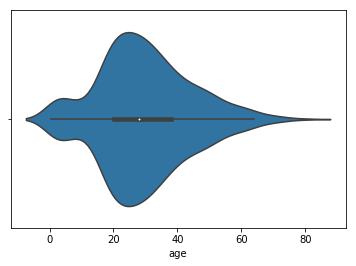

In [9]:
sns.violinplot(features['age'])

In [10]:
mediana = X_train['age'].median()
media = X_train['age'].mean()
moda = X_train['age'].mode()

print(mediana)
print(media)
print(moda)

28.0
29.525983263598327
0    24.0
dtype: float64


In [11]:
mediana = X_train['age'].median()
features['age'] = features['age'].fillna(mediana)
X_train['age'] = X_train['age'].fillna(mediana)
X_test['age'] = X_test['age'].fillna(mediana)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [12]:
print('Qtd de linhas com missing ' + str(X_train.isnull().any(axis = 0).sum()))
print('Qtd de colunas com missing ' + str(X_train.isnull().any(axis = 1).sum()))

Qtd de linhas com missing 0
Qtd de colunas com missing 0


# Naive Bayes

In [13]:
from sklearn.naive_bayes import GaussianNB
gauss = GaussianNB()
gauss.fit(X_train, y_train)
predicted = gauss.predict(X_test)


In [14]:
mat = confusion_matrix(y_pred= predicted, y_true=y_test)
# sns.heatmap(mat, square=True, annot=True, cbar=False)
# import matplotlib.pyplot as plt
# plt.xlabel('predicted value')
 
# plt.ylabel('true value');

print(mat)
print(accuracy_score(y_pred= predicted, y_true=y_test))
print(f1_score(y_pred= predicted, y_true=y_test))
print(recall_score(y_pred= predicted, y_true=y_test))
print(precision_score(y_pred= predicted, y_true=y_test))


[[141  34]
 [ 31  89]]
0.7796610169491526
0.7325102880658436
0.7416666666666667
0.7235772357723578


Text(91.68,0.5,'predicted label')

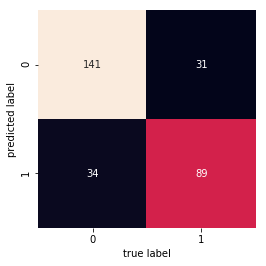

In [15]:
sns.heatmap(
    mat.T, 
    square=True, 
    annot=True, 
    fmt='d', 
    cbar=False
)
plt.xlabel('true label')
plt.ylabel('predicted label')

# Arvore de Decisão 

In [16]:
tree = DecisionTreeClassifier(random_state = 42)
tree.fit(X_train,y_train)

predicted = tree.predict(X_test)

In [17]:
mat = confusion_matrix(y_pred= predicted, y_true=y_test)
# sns.heatmap(mat, square=True, annot=True, cbar=False)
# import matplotlib.pyplot as plt
# plt.xlabel('predicted value')
 
# plt.ylabel('true value');

print(mat)
print(accuracy_score(y_pred= predicted, y_true=y_test))
print(f1_score(y_pred= predicted, y_true=y_test))
print(recall_score(y_pred= predicted, y_true=y_test))
print(precision_score(y_pred= predicted, y_true=y_test))


[[135  40]
 [ 28  92]]
0.7694915254237288
0.7301587301587302
0.7666666666666667
0.696969696969697


Text(91.68,0.5,'predicted label')

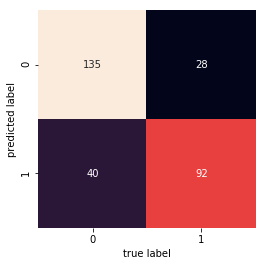

In [18]:
sns.heatmap(
    mat.T, 
    square=True, 
    annot=True, 
    fmt='d', 
    cbar=False
)
plt.xlabel('true label')
plt.ylabel('predicted label')

# Grid Search + Kfold

In [19]:
parametros ={
    'max_depth': [2,3,4,5,6],
#     'max_features': ['auto', 'sqrt'],
#     'max_leaf_nodes': [''],
}
model = GridSearchCV(cv = 10, estimator= tree, n_jobs=4, param_grid= parametros)
model.fit(X_train,y_train)

predicted = model.predict(X_test)

In [20]:
mat = confusion_matrix(y_pred= predicted, y_true=y_test)
print(mat)
print(accuracy_score(y_pred= predicted, y_true=y_test))
print(f1_score(y_pred= predicted, y_true=y_test))
print(recall_score(y_pred= predicted, y_true=y_test))
print(precision_score(y_pred= predicted, y_true=y_test))


[[156  19]
 [ 31  89]]
0.8305084745762712
0.780701754385965
0.7416666666666667
0.8240740740740741


In [21]:
model.best_params_

{'max_depth': 3}

In [22]:
# seto o modelo como o melhor estimador
model = model.best_estimator_

# Exportar arvore para visualizar

In [23]:
from sklearn import tree
from sklearn.externals.six import StringIO  
import pydot 


dot_data = StringIO() 

tree.export_graphviz(model, out_file= 'tree.dot') 

In [24]:
# features.columns

# Redução de dimensionalidade

## Visualização em 2D

In [25]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(features)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [26]:
type(target)

pandas.core.series.Series

In [27]:
finalDf = pd.concat([principalDf, target], axis = 1)

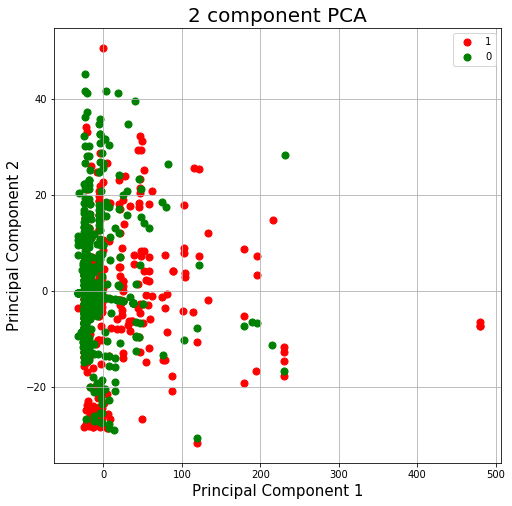

In [28]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1, 0]
colors = ['r', 'g']
for targetx, color in zip(targets,colors):
    indicesToKeep = finalDf['survived'] == targetx
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## Rodar Arvore com redução de dimensão

In [29]:
features.shape

(891, 22)

In [30]:
pca = PCA(
    n_components = 6,
#     tol=0.95
)
principalComponents = pca.fit_transform(features)
principalDf = pd.DataFrame(data = principalComponents)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(principalDf, target, test_size=0.33, random_state=42)

In [32]:
tree = DecisionTreeClassifier(random_state = 42)
parametros ={
    'max_depth': [2,3,4,5,6],
#     'max_features': ['auto', 'sqrt'],
#     'max_leaf_nodes': [''],
}
model = GridSearchCV(cv = 10, estimator= tree, n_jobs=4, param_grid= parametros)
model.fit(X_train,y_train)

predicted = model.predict(X_test)

In [33]:
mat = confusion_matrix(y_pred= predicted, y_true=y_test)
print(mat)
print(accuracy_score(y_pred= predicted, y_true=y_test))
print(f1_score(y_pred= predicted, y_true=y_test))
print(recall_score(y_pred= predicted, y_true=y_test))
print(precision_score(y_pred= predicted, y_true=y_test))

#Saiu ligeiramente pior

[[158  17]
 [ 34  86]]
0.8271186440677966
0.7713004484304932
0.7166666666666667
0.8349514563106796


Text(91.68,0.5,'predicted label')

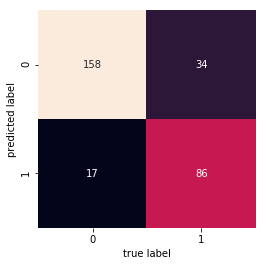

In [34]:
sns.heatmap(
    mat.T, 
    square=True, 
    annot=True, 
    fmt='d', 
    cbar=False
)
plt.xlabel('true label')
plt.ylabel('predicted label')

# SVM

In [35]:
from sklearn.svm import LinearSVC
svm = LinearSVC(
#     penalty= 'l1',
    C = 0.015
               )
svm.fit(X_train, y_train)
predicted = svm.predict(X_test)



In [36]:
mat = confusion_matrix(y_pred= predicted, y_true=y_test)
print(mat)
print(accuracy_score(y_pred= predicted, y_true=y_test))
print(f1_score(y_pred= predicted, y_true=y_test))
print(recall_score(y_pred= predicted, y_true=y_test))
print(precision_score(y_pred= predicted, y_true=y_test))



#Saiu ligeiramente pior

[[155  20]
 [ 32  88]]
0.823728813559322
0.7719298245614035
0.7333333333333333
0.8148148148148148


Text(91.68,0.5,'predicted label')

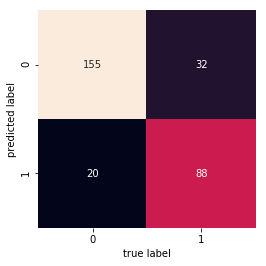

In [37]:
sns.heatmap(
    mat.T, 
    square=True, 
    annot=True, 
    fmt='d', 
    cbar=False
)
plt.xlabel('true label')
plt.ylabel('predicted label')

# Tabela Dinamica 

In [38]:
type(titanic)

pandas.core.frame.DataFrame

In [39]:
titanic.pivot_table('survived', index = 'sex', columns = 'class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [40]:
titanic.pivot_table('survived', 
                    index = 'embark_town', 
                    columns = 'class', 
                    margins= True)

class,First,Second,Third,All
embark_town,,,,
Cherbourg,0.694118,0.529412,0.378788,0.553571
Queenstown,0.500000,0.666667,0.375000,0.389610
Southampton,0.582677,0.463415,0.189802,0.336957
All,0.626168,0.472826,0.242363,0.382452


In [41]:
titanic.pivot_table('survived', 
                    index = 'deck', 
                    columns = 'class',
#                      aggfunN = ,
                    margins= True)

class,First,Second,Third,All
deck,,,,
A,0.466667,NaN,NaN,0.466667
B,0.744681,NaN,NaN,0.744681
C,0.593220,NaN,NaN,0.593220
D,0.758621,0.7500,NaN,0.757576
E,0.720000,0.7500,1.0,0.750000
F,NaN,0.8750,0.2,0.615385
G,NaN,NaN,0.5,0.500000
All,0.668571,0.8125,0.5,0.669951


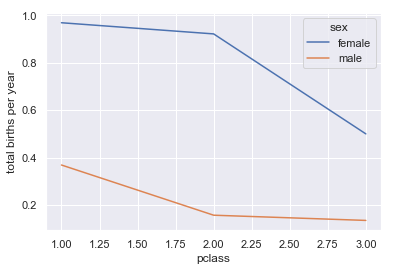

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()  # use Seaborn styles
titanic.pivot_table('survived', index='pclass', columns='sex', aggfunc='mean').plot()
plt.ylabel('total births per year');

In [43]:
# 'fare', 'adult_male', 'class_Second', 'class_Third', 'deck_C', 'deck_D',